<a href="https://colab.research.google.com/github/nischaya25/Trader-Behavior-vs-Market-Sentiment/blob/main/cleaning_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [9]:
df=historical_data = pd.read_csv('/content/historical_data.csv')

In [10]:
historical_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [11]:
historical_data.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [12]:
historical_data.shape

(211224, 16)

In [13]:
historical_data.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [14]:
historical_data.duplicated().sum()

np.int64(0)

In [25]:
df=fear_greed_index = pd.read_csv('/content/fear_greed_index.csv')

In [16]:
fear_greed_index.sample(5)

,timestamp,value,classification,date
2367,1722231000,74,Greed,2024-07-29
2135,1702186200,74,Greed,2023-12-10
769,1584163800,8,Extreme Fear,2020-03-14
826,1589088600,48,Neutral,2020-05-10
1881,1680240600,63,Greed,2023-03-31


In [17]:
fear_greed_index.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [18]:
fear_greed_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [19]:
fear_greed_index.shape

(2644, 4)

In [20]:
fear_greed_index.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [21]:
fear_greed_index.duplicated().sum()

np.int64(0)

In [22]:
fear_greed_index['date'] = pd.to_datetime(fear_greed_index['date'])

In [23]:
historical_data['datetime'] = pd.to_datetime(historical_data['Timestamp IST'], dayfirst=True, errors='coerce')

In [24]:
df = df.drop_duplicates()

In [26]:
df.isnull().sum()
df = df.dropna()

In [29]:
historical_data['date'] = historical_data['datetime'].dt.normalize()

In [28]:
historical_data['win'] = (historical_data['Closed PnL'] > 0).astype(int)

In [31]:
win_rate = historical_data.groupby('Account')['win'].mean().reset_index()
win_rate.rename(columns={'win':'win_rate'}, inplace=True)

In [33]:
drawdown = historical_data.groupby('Account')['Closed PnL'].std().reset_index()
drawdown.rename(columns={'Closed PnL':'drawdown_proxy'}, inplace=True)

In [35]:
historical_data['date'] = pd.to_datetime(historical_data['date'])
fear_greed_index['date'] = pd.to_datetime(fear_greed_index['date'])
merged = pd.merge(historical_data, fear_greed_index, on='date', how='inner')

In [36]:
#Trade Direction Classification
def categorize_trade(direction):
    d = str(direction).lower()
    if 'open long' in d: return 'Open Long'
    if 'open short' in d: return 'Open Short'
    if 'close' in d: return 'Close'
    return 'Other'

merged['Trade Category'] = merged['Direction'].apply(categorize_trade)

In [37]:
merged.sample(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Fee,Trade ID,Timestamp,datetime,win,date,timestamp,value,classification,Trade Category
16513,0x083384f897ee0f19899168e3b1bec365f52a9012,SOL,211.00000,3.00,633.00,SELL,04-02-2025 18:02,-5584.8900,Open Short,0.0,...,0.031650,7.720000e+12,1.740000e+12,2025-02-04 18:02:00,0,2025-02-04,1738647000,72,Greed,Open Short
186534,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,14.86600,33.63,499.94,SELL,28-03-2025 07:54,-612.7800,Open Short,0.0,...,0.149983,8.260000e+14,1.740000e+12,2025-03-28 07:54:00,0,2025-03-28,1743139800,44,Fear,Open Short
136253,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,PURR/USDC,0.26897,104.00,27.97,BUY,07-01-2025 22:39,44217.8315,Buy,0.0,...,0.036390,3.590000e+14,1.740000e+12,2025-01-07 22:39:00,0,2025-01-07,1736227800,78,Extreme Greed,Other
64025,0xbaaaf6571ab7d571043ff1e313a9609a10637864,HYPE,21.20000,25.62,543.14,BUY,24-02-2025 13:54,119134.5600,Open Long,0.0,...,0.052141,1.030000e+15,1.740000e+12,2025-02-24 13:54:00,0,2025-02-24,1740375000,49,Neutral,Open Long
173597,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,20.60000,84.73,1745.44,SELL,27-02-2025 07:45,-1736.0500,Open Short,0.0,...,0.087271,1.110000e+15,1.740000e+12,2025-02-27 07:45:00,0,2025-02-27,1740634200,10,Extreme Fear,Open Short


In [38]:
merged['Coin'].unique()

array(['@107', 'AAVE', 'DYDX', 'AIXBT', 'GMX', 'EIGEN', 'HYPE', 'SOL',
       'SUI', 'DOGE', 'ETH', 'kPEPE', 'TRUMP', 'ONDO', 'ENA', 'LINK',
       'XRP', 'S', 'BNB', 'BERA', 'WIF', 'LAYER', 'MKR', 'KAITO', 'IP',
       'JUP', 'USUAL', 'ADA', 'BTC', 'PURR/USDC', 'ZRO', '@7', '@19',
       '@21', '@44', '@48', '@11', '@15', '@46', '@61', '@28', '@45',
       '@9', '@41', '@38', 'kSHIB', 'GRASS', 'TAO', 'AVAX', '@2', '@6',
       '@8', '@10', '@12', '@16', '@17', '@35', '@26', '@24', '@32',
       '@29', '@31', '@33', '@34', '@36', '@37', '@47', '@53', '@74',
       'RUNE', 'CANTO', 'NTRN', 'BLUR', 'ZETA', 'MINA', 'MANTA', 'RNDR',
       'WLD', 'kBONK', 'ALT', 'INJ', 'STG', 'ZEN', 'MAVIA', 'PIXEL',
       'ILV', 'FET', 'STRK', 'CAKE', 'STX', 'ACE', 'PENDLE', 'AR', 'XAI',
       'APE', 'MEME', 'NEAR', 'SEI', 'FTM', 'MYRO', 'BIGTIME', 'IMX',
       'BADGER', 'POLYX', 'OP', 'TNSR', 'MAV', 'TIA', 'MERL', 'TON',
       'PURR', 'ME', 'CRV', 'BRETT', 'CHILLGUY', 'MOODENG', 'VIRTUAL',
       'CO

In [39]:
merged['Coin'].value_counts()

,count
Coin,
HYPE,68005
@107,29992
BTC,26064
ETH,11158
SOL,10691
...,...
@18,1
@30,1
@25,1


In [40]:
# Filter for opening trades to see bias
opening_trades = merged[merged['Trade Category'].isin(['Open Long', 'Open Short'])]
bias_stats = opening_trades.groupby(['classification', 'Trade Category']).size().unstack(fill_value=0)
bias_stats = bias_stats.reindex(['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])

In [41]:
# Filter for realized PnL to see performance
realized = merged[merged['Closed PnL'] != 0].copy()
realized['Win'] = realized['Closed PnL'] > 0

In [42]:
perf_stats = realized.groupby('classification').agg({
    'Closed PnL': lambda x: (x[x>0].sum() / abs(x[x<0].sum())) if x[x<0].sum() != 0 else np.nan,
    'Win': 'mean'
}).rename(columns={'Closed PnL': 'Profit Factor', 'Win': 'Win Rate'})
perf_stats = perf_stats.reindex(['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])

In [43]:
#setting path to store the images¶
root_dir = 'ds_'
output_dir = os.path.join(root_dir, 'outputs')
os.makedirs(output_dir, exist_ok=True)
sns.set(style="whitegrid", context="talk")

Plot A: Behavioral Bias (Long vs Short)

<Figure size 100x600 with 0 Axes>

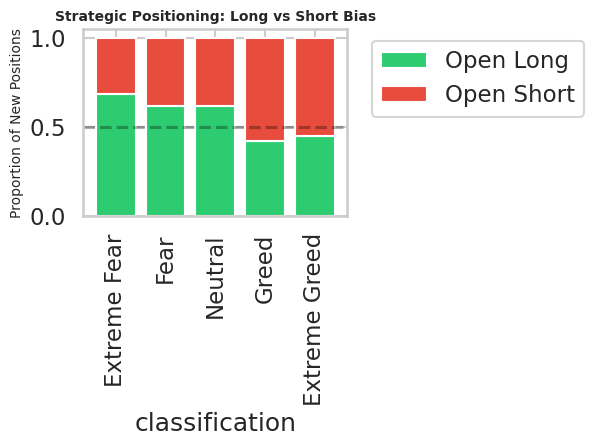

In [44]:
# Normalize to percentages
bias_pct = bias_stats.div(bias_stats.sum(axis=1), axis=0)

plt.figure(figsize=(1, 6))
bias_pct.plot(kind='bar', stacked=True, color=['#2ecc71', '#e74c3c'], width=0.8)
plt.title('Strategic Positioning: Long vs Short Bias', fontsize=10, fontweight='bold')
plt.ylabel('Proportion of New Positions', fontsize = 10)
plt.axhline(0.5, color='black', linestyle='--', alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [45]:
plt.savefig(os.path.join(output_dir, 'strategic_bias.png'))
plt.close()

# Plot B: Performance Matrix


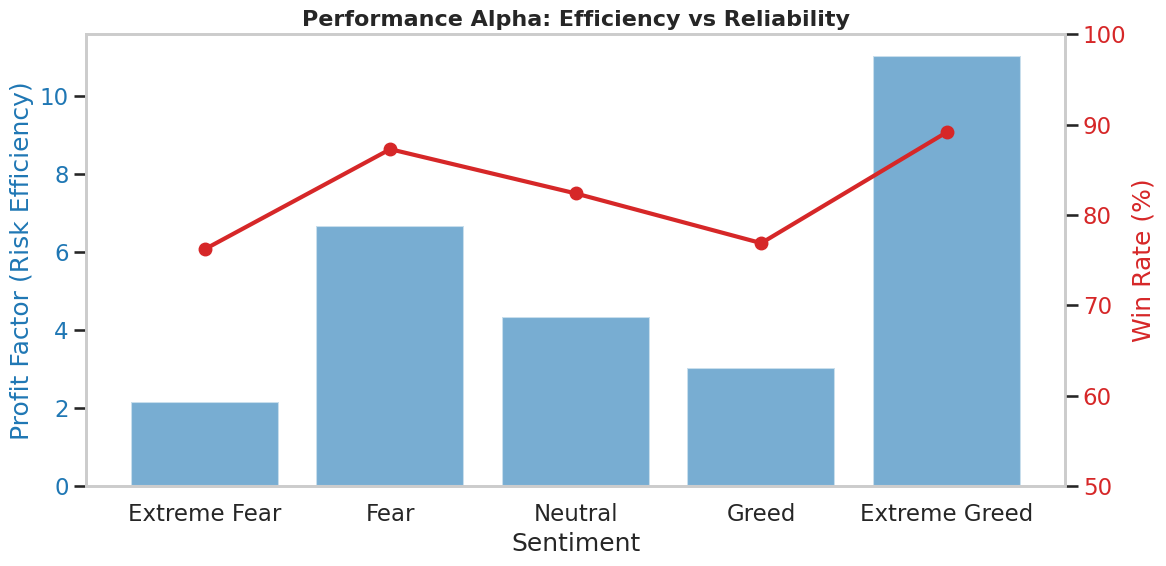

In [46]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Profit Factor (Risk Efficiency)', color=color)
ax1.bar(perf_stats.index, perf_stats['Profit Factor'], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Win Rate (%)', color=color)
ax2.plot(perf_stats.index, perf_stats['Win Rate']*100, color=color, marker='o', linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(50, 100)
ax2.grid(False)

plt.title('Performance Alpha: Efficiency vs Reliability', fontsize=16, fontweight='bold')
plt.tight_layout()


#Plot C: Capital Allocation: Top 10 Traded Assets


/tmp/ipython-input-916/1254262415.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_coins.values, y=top_coins.index, palette='Blues')


Text(0, 0.5, 'Asset Symbol')

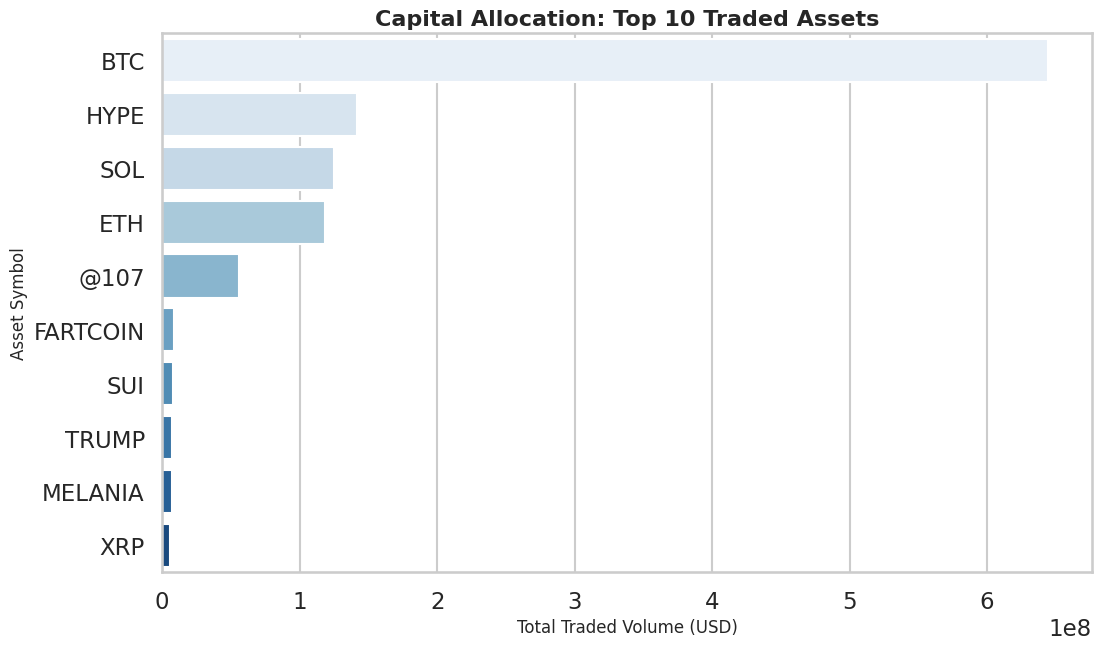

In [47]:

top_coins = historical_data.groupby('Coin')['Size USD'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_coins.values, y=top_coins.index, palette='Blues')
plt.title('Capital Allocation: Top 10 Traded Assets', fontsize=16, fontweight='bold')
plt.xlabel('Total Traded Volume (USD)', fontsize=12)
plt.ylabel('Asset Symbol', fontsize=12)

In [48]:
plt.savefig(os.path.join(output_dir, 'asset_allocation.png'), bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

#Plot D: Operational Rhythm: Weekly Trading Heatmap

Text(129.08333333333334, 0.5, 'Day of Week')

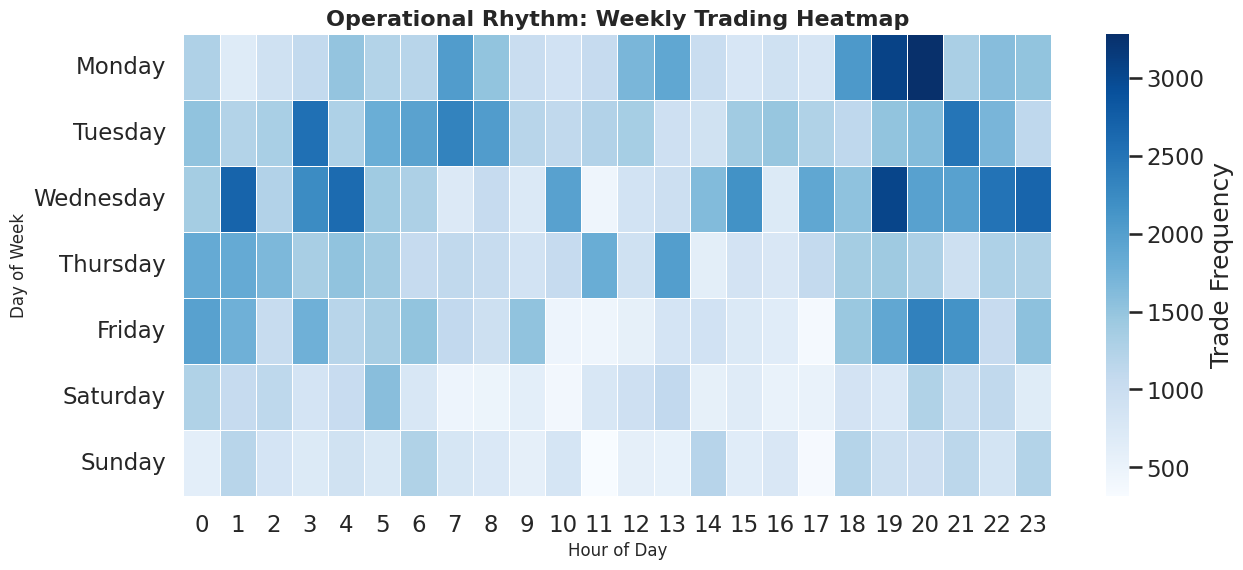

In [49]:

# Extract Hour and Day
historical_data['Hour'] = historical_data['datetime'].dt.hour
historical_data['DayOfWeek'] = historical_data['datetime'].dt.day_name()

# Creating Matrix
heatmap_data = historical_data.groupby(['DayOfWeek', 'Hour']).size().unstack(fill_value=0)
# Reorder for logical week view
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='Blues', linewidths=0.5, cbar_kws={'label': 'Trade Frequency'})
plt.title('Operational Rhythm: Weekly Trading Heatmap', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)

In [50]:
plt.savefig(os.path.join(output_dir, 'trading_heatmap.png'), bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

Plot E: Business Efficiency: Net Profit vs. Operational Costs (Fees)'

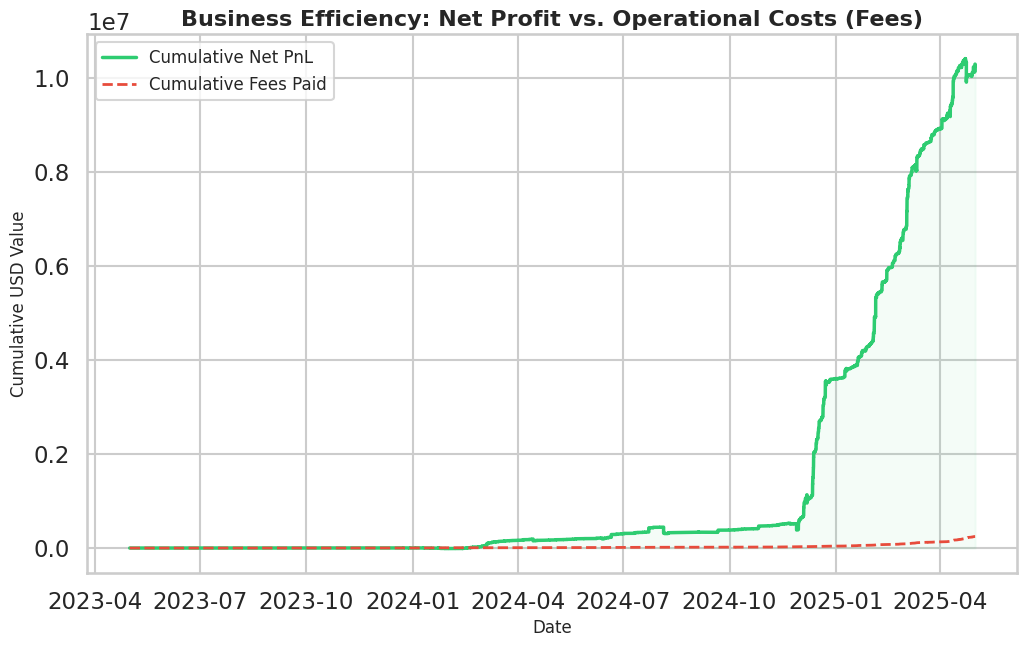

In [51]:
# Sort by time for cumulative calculation
df_sorted = historical_data.sort_values('datetime')
df_sorted['CumPnL'] = df_sorted['Closed PnL'].cumsum()
df_sorted['CumFee'] = df_sorted['Fee'].cumsum()

plt.figure(figsize=(12, 7))
plt.plot(df_sorted['datetime'], df_sorted['CumPnL'], label='Cumulative Net PnL', color='#2ecc71', linewidth=2.5)
plt.plot(df_sorted['datetime'], df_sorted['CumFee'], label='Cumulative Fees Paid', color='#e74c3c', linestyle='--', linewidth=2)
plt.title('Business Efficiency: Net Profit vs. Operational Costs (Fees)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative USD Value', fontsize=12)
plt.legend(fontsize=12)
plt.fill_between(df_sorted['datetime'], df_sorted['CumPnL'], color='#2ecc71', alpha=0.05)

In [52]:
plt.savefig(os.path.join(output_dir, 'fee_vs_pnl.png'), bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

In [55]:
#Creating Realized PNL and Drawdown curve

In [53]:
# A. Realized PnL
realized_pnl = historical_data[historical_data['Closed PnL'] != 0]['Closed PnL']

# B. Drawdown Curve
historical_data['Cumulative PnL'] = historical_data['Closed PnL'].cumsum()
historical_data['High Water Mark'] = historical_data['Cumulative PnL'].cummax()
historical_data['Drawdown'] = historical_data['Cumulative PnL'] - historical_data['High Water Mark']

# Calculating Max Drawdown (MDD)
mdd = historical_data['Drawdown'].min()

# Getting the date of the max drawdown safely
if not historical_data['Drawdown'].isna().all():
    mdd_date = historical_data.loc[historical_data['Drawdown'] == mdd, 'datetime'].iloc[0]
else:
    mdd = 0
    mdd_date = historical_data['datetime'].iloc[0]

#Plot F: Risk Profile: PnL Distribution & Tail Risk

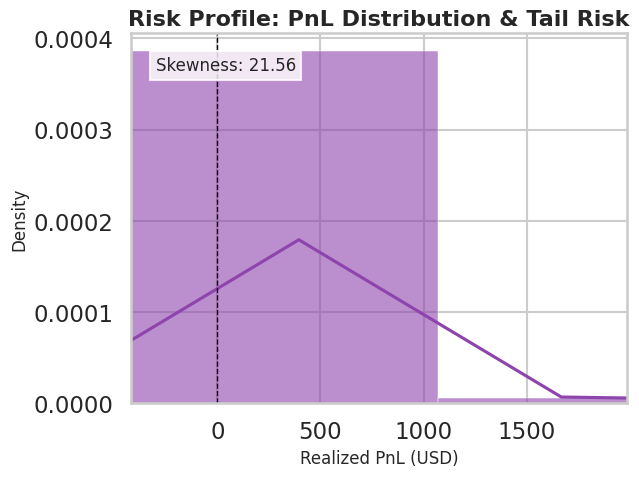

<Figure size 1200x600 with 0 Axes>

In [58]:
# Histogram with KDE
sns.histplot(realized_pnl, bins=100, kde=True, color='#8e44ad', stat='density', alpha=0.6)

# Adding reference line at 0
plt.axvline(0, color='black', linestyle='--', linewidth=1)

# Annotations for Skewed data
skew = realized_pnl.skew()
plt.text(0.05, 0.9, f'Skewness: {skew:.2f}', transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Formatting to handle outliers
plt.xlim(realized_pnl.quantile(0.01), realized_pnl.quantile(0.99))
plt.title('Risk Profile: PnL Distribution & Tail Risk', fontsize=16, fontweight='bold')
plt.xlabel('Realized PnL (USD)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.figure(figsize=(12, 6))
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'risk_pnl_distribution.png'))
plt.show()

Plot G: Capital Preservation: Drawdown Chart

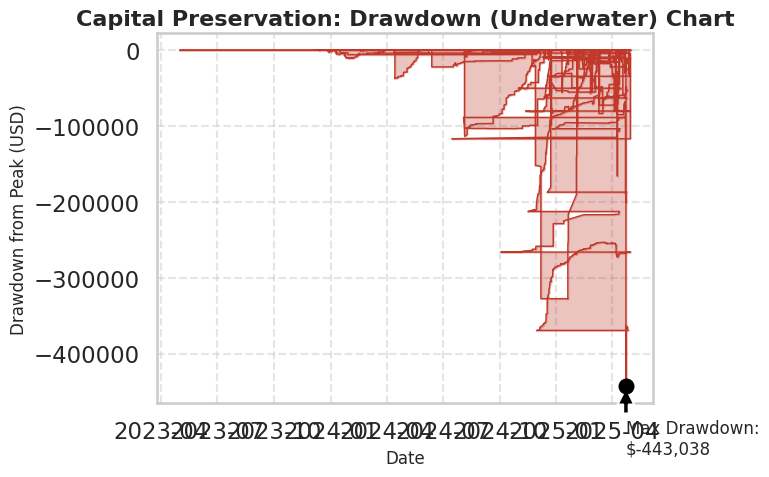

<Figure size 1200x600 with 0 Axes>

In [54]:
# Filling the area for drawdown
plt.fill_between(historical_data['datetime'], historical_data['Drawdown'], 0, color='#c0392b', alpha=0.3)
plt.plot(historical_data['datetime'], historical_data['Drawdown'], color='#c0392b', linewidth=1)

# Highlighting the Max Drawdown
plt.scatter([mdd_date], [mdd], color='black', s=100, zorder=5)
plt.annotate(f'Max Drawdown:\n${mdd:,.0f}',
             xy=(mdd_date, mdd),
             xytext=(mdd_date, mdd*1.2),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)

plt.title('Capital Preservation: Drawdown (Underwater) Chart', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Drawdown from Peak (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.figure(figsize=(12, 6))
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'risk_drawdown.png'))
plt.show()

In [55]:
print(f"Risk visualizations saved to {output_dir}")
print(f"   - Max Drawdown: ${mdd:,.2f}")

Risk visualizations saved to ds_/outputs
   - Max Drawdown: $-443,038.35


Plot H: Asset **Performance**

/tmp/ipython-input-916/25001795.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=combined_pnl.values, y=combined_pnl.index, palette=colors)


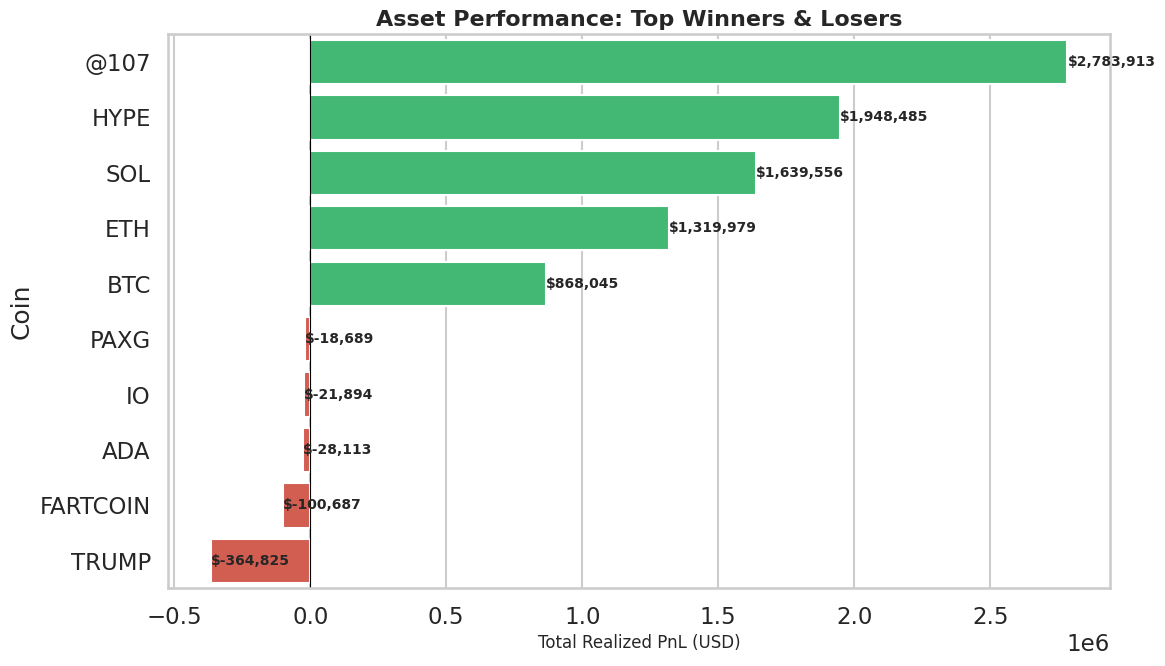

In [56]:
if 'historical_data' in locals():
    coin_pnl = historical_data.groupby('Coin')['Closed PnL'].sum().sort_values(ascending=False)

    # Get Top 5 Winners and Bottom 5 Losers
    top_winners = coin_pnl.head(5)
    top_losers = coin_pnl.tail(5)
    combined_pnl = pd.concat([top_winners, top_losers])

    plt.figure(figsize=(12, 7))
    # Color logic: Green for Profit, Red for Loss
    colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in combined_pnl.values]

    sns.barplot(x=combined_pnl.values, y=combined_pnl.index, palette=colors)
    plt.title('Asset Performance: Top Winners & Losers', fontsize=16, fontweight='bold')
    plt.xlabel('Total Realized PnL (USD)', fontsize=12)
    plt.axvline(0, color='black', linewidth=0.8)

    # Adding labels
    for i, v in enumerate(combined_pnl.values):
        offset = 500 if v > 0 else -500
        plt.text(v, i, f'${v:,.0f}', va='center', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'asset_performance.png'))
    plt.show()

In [64]:
historical_data['datetime'] = pd.to_datetime(historical_data['Timestamp IST'], dayfirst=True, errors='coerce')
historical_data['Hour'] = historical_data['datetime'].dt.hour

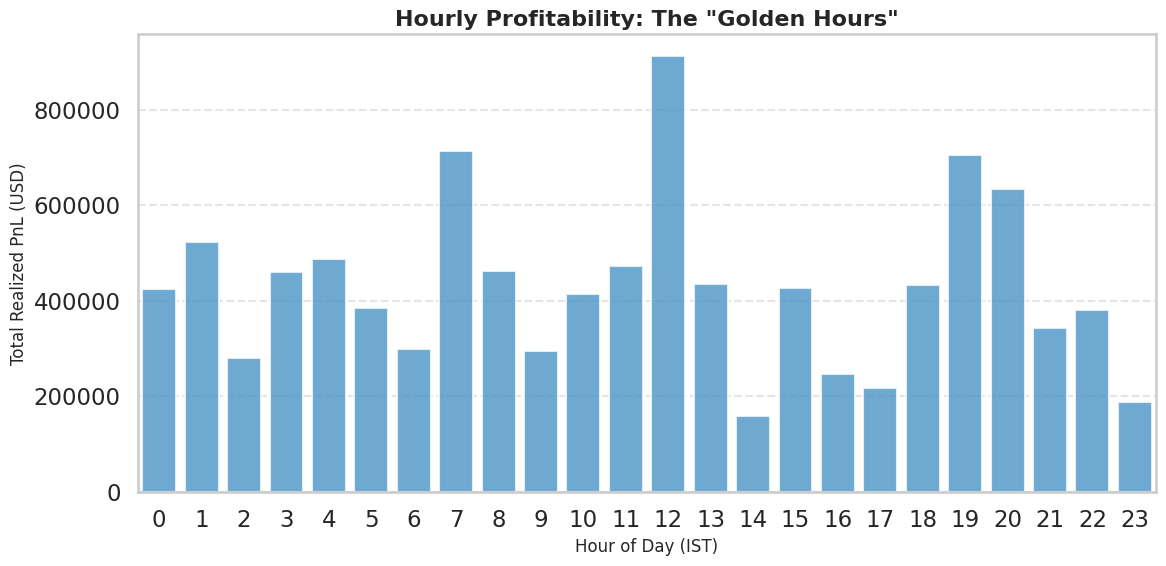

In [57]:
if 'historical_data' in locals():
    hourly_pnl = historical_data.groupby('Hour')['Closed PnL'].sum()

    plt.figure(figsize=(12, 6))
    sns.barplot(x=hourly_pnl.index, y=hourly_pnl.values, color='#3498db', alpha=0.8)

    plt.title('Hourly Profitability: The "Golden Hours"', fontsize=16, fontweight='bold')
    plt.xlabel('Hour of Day (IST)', fontsize=12)
    plt.ylabel('Total Realized PnL (USD)', fontsize=12)
    plt.axhline(0, color='black', linewidth=0.8)
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'hourly_pnl.png'))
    plt.show()

Plot J: Market Regime Overlay

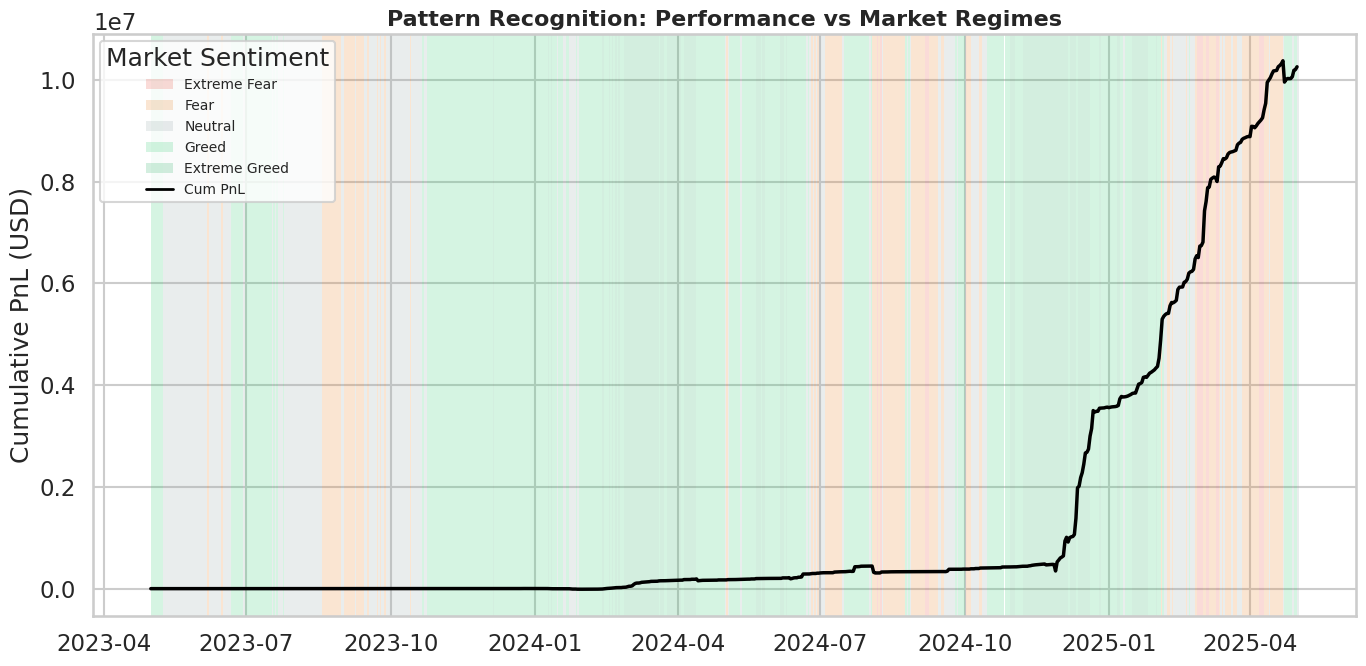

In [60]:

if 'merged' in locals():

    # Preparing the Data
    daily_pnl = merged.groupby('date')['Closed PnL'].sum().reset_index()
    daily_pnl['CumPnL'] = daily_pnl['Closed PnL'].cumsum()

    # Continuous date range
    date_range = pd.date_range(daily_pnl['date'].min(), daily_pnl['date'].max())
    sentiment_map = fear_greed_index.set_index('date')['classification']

    full_df = pd.DataFrame({'date': date_range})
    full_df = pd.merge(full_df, daily_pnl, on='date', how='left')
    full_df['CumPnL'] = full_df['CumPnL'].ffill().fillna(0)
    full_df['Sentiment'] = full_df['date'].map(sentiment_map)

    # Plotting
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.plot(full_df['date'], full_df['CumPnL'], color='black', linewidth=2.5, label='Strategy Cumulative PnL')

    # Background Colors
    regime_colors = {
        'Extreme Fear': '#e74c3c', 'Fear': '#e67e22',
        'Neutral': '#95a5a6', 'Greed': '#2ecc71', 'Extreme Greed': '#27ae60'
    }

    # Draw Spans
    full_df['Sentiment_Shift'] = full_df['Sentiment'].ne(full_df['Sentiment'].shift())
    change_indices = full_df.index[full_df['Sentiment_Shift']].tolist()
    change_indices.append(len(full_df))

    for i in range(len(change_indices)-1):
        start_idx = change_indices[i]
        end_idx = change_indices[i+1]
        segment_sentiment = full_df['Sentiment'].iloc[start_idx]
        if pd.isna(segment_sentiment): continue
        start_date = full_df['date'].iloc[start_idx]
        end_date = full_df['date'].iloc[end_idx-1] + pd.Timedelta(days=1)

        ax.axvspan(start_date, end_date, color=regime_colors.get(segment_sentiment, 'white'), alpha=0.2, lw=0)

    # Legend & Titles
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor=c, edgecolor='none', alpha=0.2, label=l) for l, c in regime_colors.items()]
    legend_elements.append(plt.Line2D([0], [0], color='black', lw=2, label='Cum PnL'))

    ax.legend(handles=legend_elements, loc='upper left', fontsize=10, title='Market Sentiment')
    ax.set_title('Pattern Recognition: Performance vs Market Regimes', fontsize=16, fontweight='bold')
    ax.set_ylabel('Cumulative PnL (USD)')

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'pattern_regime_overlay.png'))
    plt.show()

Plot K: Rolling Prediction Chart

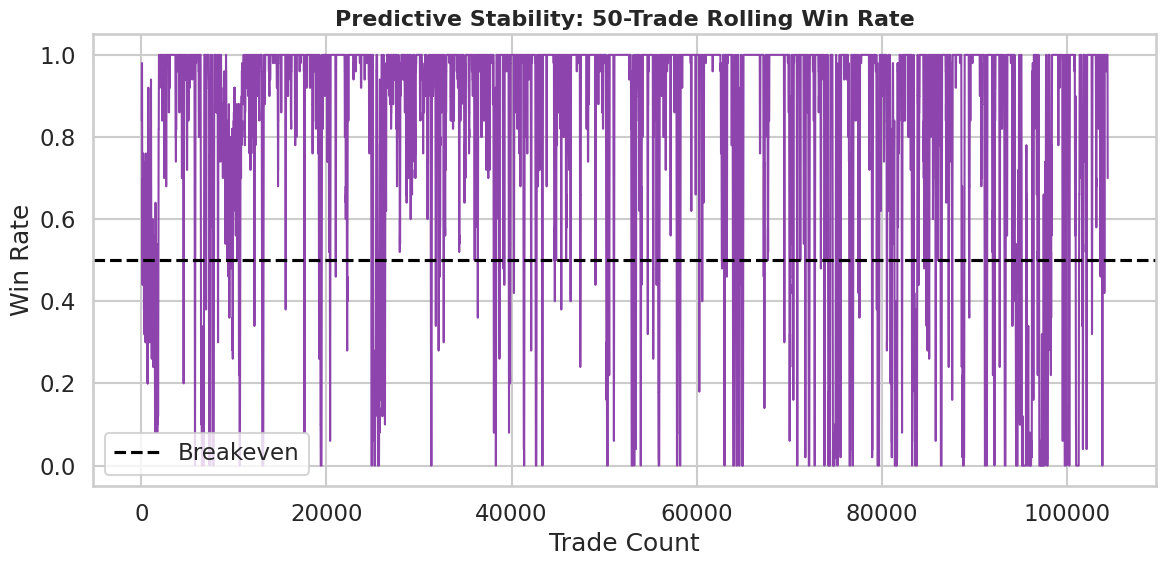

In [59]:
if 'merged' in locals():

    trades_sorted = merged.sort_values('datetime').dropna(subset=['Closed PnL'])
    trades_sorted = trades_sorted[trades_sorted['Closed PnL'] != 0]
    trades_sorted['Win'] = (trades_sorted['Closed PnL'] > 0).astype(int)

    window = 50
    trades_sorted['Rolling_WinRate'] = trades_sorted['Win'].rolling(window=window).mean()

    plt.figure(figsize=(12, 6))
    plt.plot(range(len(trades_sorted)), trades_sorted['Rolling_WinRate'], color='#8e44ad', linewidth=1.5)

    plt.axhline(0.5, color='black', linestyle='--', label='Breakeven')
    plt.title(f'Predictive Stability: {window}-Trade Rolling Win Rate', fontsize=16, fontweight='bold')
    plt.xlabel('Trade Count')
    plt.ylabel('Win Rate')
    plt.legend()

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'pattern_rolling_stability.png'))

    # Force Show
    plt.show()

In [64]:
pnl_std = historical_data.groupby('Account')['Closed PnL'].std()

consistency = pnl_std.apply(
    lambda x: "Consistent" if x<pnl_std.median() else "Inconsistent"
)

In [67]:
trade_count = historical_data.groupby('Account').size()

freq_segment = trade_count.apply(
    lambda x: "Frequent" if x>trade_count.median() else "Infrequent"
)

In [68]:
from google.colab import files

merged.to_csv("processed_trader_data.csv", index=False)
files.download("processed_trader_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>